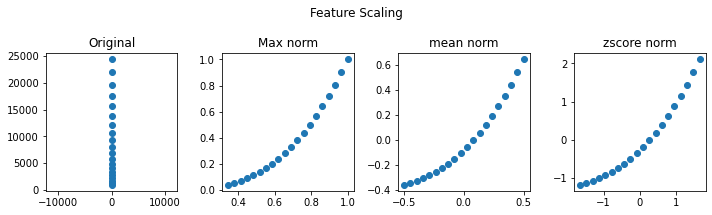

[692.18440693 708.89321683 713.70890775 710.05919742 701.10161121]
[1045.04373834 1071.10430618 1078.9905005  1073.888736   1060.6058917 ]
[1224.3340231  1255.97575762 1266.03318317 1260.59795324 1245.35486214]
[1314.84765541 1350.13470107 1361.89688841 1356.69484898 1340.69672928]
[1359.96006251 1397.89520321 1411.11715691 1406.43268616 1390.29151648]
[1381.85981293 1421.92607277 1436.47616532 1432.44930512 1416.4736444 ]
[1391.89733366 1433.82348184 1449.62815107 1446.32517022 1430.66841467]
[1395.87879914 1439.519393   1456.53485129 1453.98434144 1438.72056473]
[1396.77422156 1442.04824171 1460.24600291 1458.45734277 1443.62009162]
[1396.10277515 1442.96223334 1462.32170836 1461.29450833 1446.89664774]
a
-2674.457609682262
b


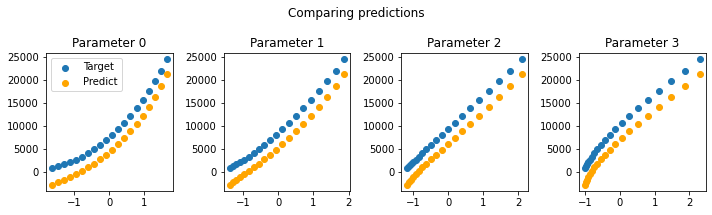

In [40]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt

t=np.arange(10,30)
y_train=t**3
X_train=np.c_[t,t**2,t**3,t**4,t**5]

#X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35],[234,6457,243,1],[546,232,43,21],[123,5,52,2],[12,3,31,64]])
#y_train = np.array([460, 232, 178,324,676,22,111])

#Las principales funciones que he visto hasta ahora:
#1. Modelo (w,b)(x)
#2. Costo del modelo  (w,b)(modelo, y)
#3. Derivada del costo (w,b)(modelo, y, x)

#4. ---> Algoritmo de SGD <--- (parámetros iniciales, x, y, alpha) 
#<--- Usa todas las demás funciones, o sea este es el que resuelve directamente el problema

#Feature scaling
#Feature engineering

def f(w,b,x):
    return b + np.dot(w,x)

def dJ(w,b,nd):
    m=len(y_train)
    t1=np.array(list(map(lambda x: f(w,b,x),X_train)))-y_train
    t2=np.array(list(map(lambda x: x[nd] if nd<len(x) else 1, X_train)))
    return np.sum(np.multiply(t1,t2))/m

def sqerror(w,b):
    return np.sum(np.array(list(map(lambda xy: pow((f(w,b,xy[0])-xy[1]),2),zip(X_train,y_train)))))/(2*len(X_train))


def grad_descent(w,b,a,n):
    for i in range(n):
        new_b = b - a*dJ(w,b,len(w))
        new_w = np.array(list(map(lambda wi: wi[1] - a*dJ(w,b,wi[0]), enumerate(w))))
        w=new_w
        b=new_b
        print(w)
        #print(sqerror(w,b))
    return [w,b]

def max_normalization(x):
    mx = np.max(x, axis=0)
    return x/mx

def mean_normalization(x):
    mu = np.mean(x,axis=0)
    mx = np.max(x,axis=0)
    mn = np.min(x,axis=0)
    return (x-mu)/(mx-mn)

def zscore_normalization(x):
    mu = np.mean(x,axis=0)
    sigma=np.std(x,axis=0)
    return (x-mu)/sigma

fig, ax = plt.subplots(1,4,figsize=(10,3))
ax[0].scatter(X_train[:,0],X_train[:,2])
ax[0].set_title("Original")
ax[0].axis('equal')

Xmax=max_normalization(X_train)
ax[1].scatter(Xmax[:,0],Xmax[:,2])
ax[1].set_title("Max norm")

Xmean=mean_normalization(X_train)
ax[2].scatter(Xmean[:,0],Xmean[:,2])
ax[2].set_title("mean norm")

Xstd=zscore_normalization(X_train)
ax[3].scatter(Xstd[:,0],Xstd[:,2])
ax[3].set_title("zscore norm")

plt.suptitle("Feature Scaling")
plt.tight_layout()
plt.show()

b_init=785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])

X_train=Xstd
Xant=X_train
ww, bb = grad_descent([0,0,0,0,0],0,0.1,10)
print("a")
print(f(ww,bb,X_train[0]))
print("b")

yp = X_train@ww+np.ones(len(X_train))*bb
X_train=Xant
fix, ax = plt.subplots(1,4,figsize=(10,3))
for i in range(4):
    ax[i].scatter(X_train[:,i],y_train,label='Target')
    ax[i].scatter(X_train[:,i],yp,color='orange',label='Predict')
    ax[i].set_title(f"Parameter {i}")
ax[0].legend()
plt.suptitle("Comparing predictions")
plt.tight_layout()
plt.show()





In [35]:
print(X_train[0])
print(list(map(lambda n: dJ(np.zeros(len(X_train[0]))+10,100,n),range(6))))

[-1.64750894 -1.38210305 -1.1713459  -1.01048819 -0.88942616]
[-6873.722860429861, -7039.7723900518085, -7087.685920236548, -7051.50381212156, -6962.587479067978, -9259.999999999998]
